In [18]:
from modsim import *

Question: What would the United States population look like if treatment for heart diseases was not availible?

The goal of this project is to model the indent in the population that would occur if treatment for heart diseases was not available in the United States. We think that the results will show some sort of decline in the U.S. population when treatment is not availible. Our goal is to have two superimposed plots on a graph. One plot will show the U.S. population when treatment is still availible as it is right now, while the other one will show the U.S. population when treatment is not availible.

We have used simulation and analysis to create this model, but still made many assumptions. For example, we assume that when an individual is affected by heart disease, they die within that given year. This is obviously not always true in the real world, but it is an assumption built into our model. 

In [19]:
#in millions
#US population was at 325.7 million in 2017
#84 million people suffer from coronary heart disease annually

US = System(birth_rate = .125, t_0 = 2017, t_end = 2050,
           w_treatment = 960, wo_treatment = 1049, popt_0 = 325.7*(10**6), #960 die a day with treatment, 1049 die a day w/o treatment
           death_rate = -0.082)
#init = State(p = popt_0)

In [20]:
def run_simulation(system):
    treated = TimeSeries()
    untreated = TimeSeries()
    results = TimeSeries()
    
    treated[system.t_0] = system.popt_0
    untreated[system.t_0] = system.popt_0
    
    for t in linrange (system.t_0, system.t_end):
        treated[t+1] = treated[t] - system.w_treatment*365.25
        untreated[t+1] = untreated[t] - system.wo_treatment*365.25 - system.w_treatment
    
    
    #this is population without without our model
    #for t in linrange (system.t_0, system.t_end): 
       # treated[t+1] = treated[t] 
       # untreated[t+1] = untreated[t] 
        
    net_growth = treated[t]*system.birth_rate + treated[t]*system.death_rate
    net_growth2 = untreated[t]*system.birth_rate + untreated[t]*system.death_rate
    
    treated = treated+net_growth
    untreated = untreated+net_growth2
    
    return treated, untreated
        
def plot_results(timeseries, timeseries2, title):
    plot(timeseries, ':', label = 'When Treated')
    plot(timeseries2, '--', label = 'When Untreated')
    decorate(xlabel = 'Year', 
             ylabel = 'Population',
             title = title)

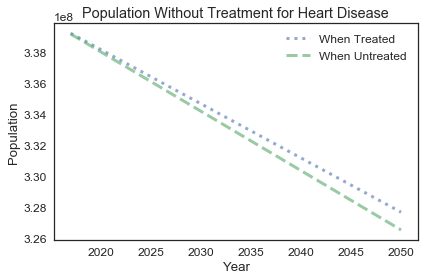

In [21]:
orig, model  = run_simulation(US)

run_simulation(US)
plot_results(orig, model, 'Population Without Treatment for Heart Disease')


Right now, the figure does not show a steady population increase for when the population continues to be treated and does not show a population decrease for when the population is untreated. 